## Imports

In [1]:
import datetime
import os

In [2]:
import sklearn_evaluation as skeval
import xgboost as xgb

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from xgboost import XGBClassifier

## Config

In [4]:
RANDOM_SEED = 42

In [5]:
data_folder = os.path.abspath(os.path.join(os.curdir, os.pardir, 'data')) + os.path.sep
aux_data_folder = os.path.join(data_folder, 'aux') + os.path.sep
preproc_data_folder = os.path.join(data_folder, 'preproc') + os.path.sep
features_data_folder = os.path.join(data_folder, 'features') + os.path.sep

## Read Data

In [6]:
X = load(features_data_folder + 'X_train_summary_stats.pickle')

In [7]:
y = load(features_data_folder + 'y_train.pickle')

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.15,
    random_state=RANDOM_SEED,
    stratify=y
)

In [9]:
print('X train:', X_train.shape)
print('y train:', y_train.shape)
print('X val:  ', X_val.shape)
print('y val:  ', y_val.shape)

X train: (343646, 12)
y train: (343646,)
X val:   (60644, 12)
y val:   (60644,)


## Train Model

In [10]:
positive_imbalance_ratio = np.count_nonzero(y_train == 0) / np.count_nonzero(y_train == 1)

In [11]:
print('Positive imbalance ratio:', positive_imbalance_ratio)

Positive imbalance ratio: 1.7085825983463778


In [12]:
xgb_params = {
    'objective': 'binary:logistic',
    'n_estimators': 100,
    'seed': RANDOM_SEED,
    'learning_rate': 0.15,
    'max_depth': 6,
    'subsample': 0.75,
    'colsample_bytree': 0.4,
    'scale_pos_weight': positive_imbalance_ratio,
    'silent': 1,
}

### Search for the best parameters

In [13]:
grid_search_parameters = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [8, 10, 12],
    'subsample': [0.7],
    'colsample_bytree': [0.8],
}

In [14]:
model = XGBClassifier(**xgb_params)

In [15]:
def log_loss_scorer(estimator, X, y):
    return -log_loss(y, estimator.predict_proba(X)[:, -1])

In [16]:
grid_search = GridSearchCV(
    model,
    grid_search_parameters,
    n_jobs=1,
    cv=3,
    verbose=2,
    scoring=log_loss_scorer
)

In [17]:
%%time
grid_search.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7, total=  30.5s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.3s remaining:    0.0s


[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7, total=  30.5s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7, total=  30.8s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7, total=  49.5s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7, total=  50.6s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=0.7, total=  50.6s
[CV] colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=700, subsample=

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=700, subsample=0.7, total= 1.5min
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=700, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=700, subsample=0.7, total= 1.5min
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=700, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=700, subsample=0.7, total= 1.5min
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=300, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=300, subsample=0.7, total=  46.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=300, subsample=0.7 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=300, subsample=0.7, total=  47.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=300, subsample=

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 88.8min finished


CPU times: user 11h 59min 51s, sys: 1min 57s, total: 12h 1min 48s
Wall time: 1h 31min 28s


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1.7085825983463778, seed=42, silent=1,
       subsample=0.75),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300, 500, 700], 'learning_rate': [0.05, 0.1, 0.3], 'max_depth': [8, 10, 12], 'subsample': [0.7], 'colsample_bytree': [0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function log_loss_scorer at 0x7f4bb81022f0>, verbose=2)

In [18]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 12,
 'n_estimators': 700,
 'subsample': 0.7}

/home/yuriyguts/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


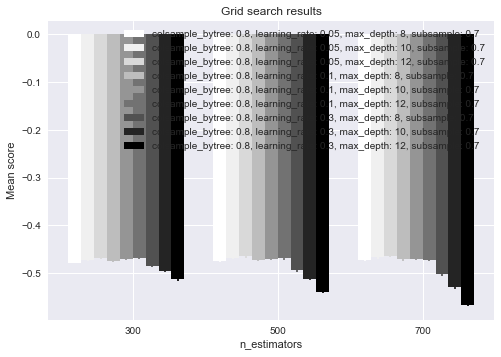

In [19]:
skeval.plot.grid_search(
    grid_search.grid_scores_,
    change='n_estimators',
    kind='bar'
)

In [20]:
# skeval.plot.grid_search(
#     search_result,
#     change=['colsample_bytree', 'subsample'],
#     subset={
#         'num_boost_round': 500,
#         'learning_rate': 0.05,
#         'max_depth': 10,
#     }
# )

### Train the model using the best parameters

In [21]:
xgb_params.update(grid_search.best_params_)

In [22]:
xgb_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 12,
 'n_estimators': 700,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1.7085825983463778,
 'seed': 42,
 'silent': 1,
 'subsample': 0.7}

In [23]:
model = XGBClassifier(**xgb_params)

In [24]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='logloss', early_stopping_rounds=10)

[0]	validation_0-logloss:0.676348
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.661783
[2]	validation_0-logloss:0.648475
[3]	validation_0-logloss:0.635596
[4]	validation_0-logloss:0.623726
[5]	validation_0-logloss:0.612974
[6]	validation_0-logloss:0.603144
[7]	validation_0-logloss:0.594736
[8]	validation_0-logloss:0.586368
[9]	validation_0-logloss:0.579166
[10]	validation_0-logloss:0.572106
[11]	validation_0-logloss:0.56582
[12]	validation_0-logloss:0.559937
[13]	validation_0-logloss:0.554317
[14]	validation_0-logloss:0.549382
[15]	validation_0-logloss:0.544496
[16]	validation_0-logloss:0.540201
[17]	validation_0-logloss:0.536386
[18]	validation_0-logloss:0.532345
[19]	validation_0-logloss:0.528565
[20]	validation_0-logloss:0.525379
[21]	validation_0-logloss:0.522209
[22]	validation_0-logloss:0.519234
[23]	validation_0-logloss:0.516698
[24]	validation_0-logloss:0.514263
[25]	validation_0-logloss:0.511669
[26]	validation_0-logloss:0.50958

[230]	validation_0-logloss:0.465271
[231]	validation_0-logloss:0.465229
[232]	validation_0-logloss:0.465201
[233]	validation_0-logloss:0.465198
[234]	validation_0-logloss:0.465149
[235]	validation_0-logloss:0.465095
[236]	validation_0-logloss:0.465049
[237]	validation_0-logloss:0.464992
[238]	validation_0-logloss:0.464972
[239]	validation_0-logloss:0.464876
[240]	validation_0-logloss:0.464861
[241]	validation_0-logloss:0.464861
[242]	validation_0-logloss:0.464867
[243]	validation_0-logloss:0.464766
[244]	validation_0-logloss:0.464763
[245]	validation_0-logloss:0.464715
[246]	validation_0-logloss:0.464709
[247]	validation_0-logloss:0.464692
[248]	validation_0-logloss:0.464631
[249]	validation_0-logloss:0.464567
[250]	validation_0-logloss:0.46455
[251]	validation_0-logloss:0.464515
[252]	validation_0-logloss:0.464487
[253]	validation_0-logloss:0.464485
[254]	validation_0-logloss:0.464449
[255]	validation_0-logloss:0.464414
[256]	validation_0-logloss:0.464358
[257]	validation_0-logloss:0.

[459]	validation_0-logloss:0.460329
[460]	validation_0-logloss:0.460325
[461]	validation_0-logloss:0.460291
[462]	validation_0-logloss:0.460258
[463]	validation_0-logloss:0.460265
[464]	validation_0-logloss:0.460275
[465]	validation_0-logloss:0.46024
[466]	validation_0-logloss:0.460203
[467]	validation_0-logloss:0.460173
[468]	validation_0-logloss:0.460171
[469]	validation_0-logloss:0.460199
[470]	validation_0-logloss:0.460157
[471]	validation_0-logloss:0.460126
[472]	validation_0-logloss:0.460113
[473]	validation_0-logloss:0.460124
[474]	validation_0-logloss:0.46013
[475]	validation_0-logloss:0.460085
[476]	validation_0-logloss:0.460058
[477]	validation_0-logloss:0.460052
[478]	validation_0-logloss:0.46004
[479]	validation_0-logloss:0.460056
[480]	validation_0-logloss:0.460042
[481]	validation_0-logloss:0.460052
[482]	validation_0-logloss:0.460031
[483]	validation_0-logloss:0.459979
[484]	validation_0-logloss:0.459952
[485]	validation_0-logloss:0.459949
[486]	validation_0-logloss:0.45

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1.7085825983463778, seed=42, silent=1,
       subsample=0.7)

## Evaluate Model

In [25]:
y_pred_train = model.predict(X_train)
y_pred_proba_train = model.predict_proba(X_train)[:, -1]

In [26]:
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, -1]

In [27]:
continuous_metrics = [log_loss, roc_auc_score]

In [28]:
binary_metrics = [accuracy_score, precision_score, recall_score]

### Train

In [29]:
for metric in continuous_metrics:
    print('{:20s}: {:10.5f}'.format(metric.__name__, metric(y_train, y_pred_proba_train)))
for metric in binary_metrics:
    print('{:20s}: {:10.5f}'.format(metric.__name__, metric(y_train, y_pred_train)))

log_loss            :    0.32575
roc_auc_score       :    0.95882
accuracy_score      :    0.85266
precision_score     :    0.72550
recall_score        :    0.96668


### Validation

In [30]:
for metric in continuous_metrics:
    print('{:20s}: {:10.5f}'.format(metric.__name__, metric(y_val, y_pred_proba_val)))
for metric in binary_metrics:
    print('{:20s}: {:10.5f}'.format(metric.__name__, metric(y_val, y_pred_val)))

log_loss            :    0.45815
roc_auc_score       :    0.85098
accuracy_score      :    0.75452
precision_score     :    0.62514
recall_score        :    0.83703
